## 正則化とRidge回帰・Lasso回帰

### 用語確認

* 正則化：パラメタを推定する際に罰則項(正則化項)を導入することで係数が大きくなることを防ぐ技法
* Ridge回帰：正則化項として係数の2乗和を用いた回帰モデルのこと。このタイプのことをL2正則化とも呼ぶ
* Lasso回帰：正則化項として係数の絶対値の和を用いた回帰モデルのこと。このタイプのことをL1正則化

正則化の強度を指定するパラメタの決定→説明変数の標準化

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
%matplotlib inline

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [8]:
df = pd.read_csv("sample/7-3-1-large-data.csv")
df.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


In [9]:
sp.mean(df, axis = 0).head(3)

X_1    0.037272
X_2    0.030649
X_3    0.027360
dtype: float64

In [10]:
df -= sp.mean(df, axis = 0)
df /= sp.std(df, ddof = 1, axis = 0)

In [15]:
sp.mean(df, axis = 0).head(3).round(3)

X_1    0.0
X_2   -0.0
X_3   -0.0
dtype: float64

In [17]:
sp.std(df, ddof=1, axis=0).head(3)

X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64

In [18]:
np.random.seed(1)
noise = stats.norm.rvs(loc = 0, scale = 1, size = df.shape[0])
y = df.X_1 * 5 + noise

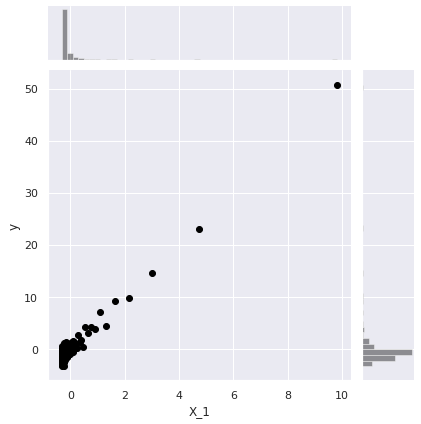

In [19]:
large_data = pd.concat([pd.DataFrame({"y":y}), df],axis = 1)
sns.jointplot(y = "y", x = "X_1", data = large_data, color = "black")

In [20]:
lm_statsmodels = sm.OLS(endog=y, exog=df).fit()
lm_statsmodels.params.head(3)

X_1     14.755018
X_2    -87.462851
X_3    211.743136
dtype: float64

In [22]:
lm_sklearn = linear_model.LinearRegression()
lm_sklearn.fit(df, y)
lm_sklearn.coef_

array([ 1.47550179e+01, -8.74628513e+01,  2.11743136e+02, -9.41534199e+01,
       -6.81749758e+01, -9.28447001e+01,  1.76121719e+00,  8.16951745e+01,
        6.68011476e+01,  2.78782307e+01, -3.28849364e+01,  6.81756488e+01,
       -1.69894294e+01,  2.20848958e+01, -4.85466254e+01, -3.39014861e+01,
       -4.53620423e+01,  9.72849512e+00,  2.48105638e+01,  1.85754373e+00,
        1.59903755e+00, -2.83817237e+01,  6.47655021e+00, -5.98019116e+01,
        3.53238055e+01, -1.30222644e+01,  4.10803607e+01, -4.30289179e+01,
        5.24669901e+01,  1.91954188e+00,  3.34187115e+01,  8.49048535e+00,
        8.32915543e+00, -2.29308318e+01, -3.57696437e+01, -1.33680102e+01,
        3.17822503e+01, -2.01837682e+01, -2.65432564e+01, -3.52327035e+01,
        1.92653681e+01,  4.82272494e+01, -1.65525248e+00,  5.74852963e-01,
       -1.89337059e+01,  7.37047591e-01,  1.04710630e+01, -7.73236212e+00,
       -1.85399868e+00, -2.55890849e-01, -5.04510048e+00, -4.22674871e+00,
        2.52338099e+01,  

* 絶対値が大きな係数が推定されている

* 通常の最小二乗法ではうまく行かないので、正則化を使用する
* 正則化において大事なのは強度α

In [24]:
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [25]:
sp.log10(ridge_alphas)

array([-2.        , -1.94489796, -1.88979592, -1.83469388, -1.77959184,
       -1.7244898 , -1.66938776, -1.61428571, -1.55918367, -1.50408163,
       -1.44897959, -1.39387755, -1.33877551, -1.28367347, -1.22857143,
       -1.17346939, -1.11836735, -1.06326531, -1.00816327, -0.95306122,
       -0.89795918, -0.84285714, -0.7877551 , -0.73265306, -0.67755102,
       -0.62244898, -0.56734694, -0.5122449 , -0.45714286, -0.40204082,
       -0.34693878, -0.29183673, -0.23673469, -0.18163265, -0.12653061,
       -0.07142857, -0.01632653,  0.03877551,  0.09387755,  0.14897959,
        0.20408163,  0.25918367,  0.31428571,  0.36938776,  0.4244898 ,
        0.47959184,  0.53469388,  0.58979592,  0.64489796,  0.7       ])

In [29]:
ridge_coefs = []
for a in range(n_alphas):
    ridge =linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(df, y)
    ridge_coefs.append(ridge.coef_)

In [30]:
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

Text(0, 0.5, 'Coefficients')

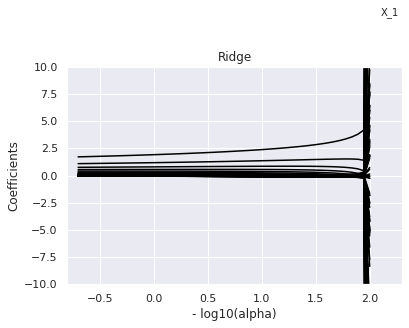

In [36]:
log_alphas = -sp.log10(ridge_alphas)
plt.plot(log_alphas, ridge_coefs, color = "black")
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0, 0], "X_1")
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
plt.ylim(-10.0, 10)
plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

* 左に行くほどαが大きくて正則化の強度が強くなる
* 右側に行くほど罰則化が緩くなり、絶対値の大きな係数が推定されやすくなる

→では最適な強度αは何でしょう？

In [38]:
ridge_best = linear_model.RidgeCV(cv = 10, alphas = ridge_alphas,
                                 fit_intercept= False)
ridge_best.fit(df, y)
-sp.log10(ridge_best.alpha_)

0.23673469387755094

In [39]:
ridge_best.alpha_

0.5797827717179138

In [41]:
ridge_best.coef_

array([ 4.46347121,  1.28833593,  0.2927883 , -0.09125431, -0.2013734 ,
       -0.23267945, -0.2152976 , -0.20601228, -0.14466992, -0.13546705,
       -0.15459478, -0.04558605, -0.09666078, -0.01680479, -0.1104025 ,
       -0.01170384, -0.09391876,  0.01281653, -0.01785413, -0.03092511,
        0.02491556, -0.02906365,  0.04336838, -0.08732207,  0.12740958,
        0.02104836,  0.0550757 , -0.07654728,  0.14076324, -0.00715595,
        0.09866008,  0.11620526, -0.04440412,  0.0366436 , -0.03447319,
        0.01506922,  0.12331243, -0.17131585, -0.00656963, -0.18198433,
        0.09024826,  0.22236343,  0.03531455, -0.03180034, -0.00842443,
        0.02505952,  0.33776614, -0.19347637, -0.1076738 ,  0.21161829,
       -0.12840793, -0.24597948,  0.24900423,  0.12824366, -0.15527051,
        0.27022964,  0.02951558, -0.16508783, -0.17754048,  0.15838542,
       -0.01114808,  0.0134762 ,  0.19362841,  0.13447836, -0.15575348,
       -0.01829021,  0.25569543,  0.22259035, -0.18458659,  0.00

In [42]:
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(df, y,
                                                      fit_intercept = False)

Text(0, 0.5, 'Coefficients')

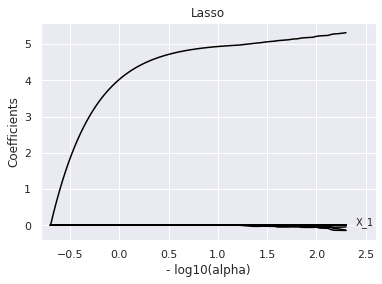

In [45]:
log_alphas = -sp.log10(lasso_alphas)
plt.plot(log_alphas, lasso_coefs.T, color = "black")
plt.text(max(log_alphas) + 0.1, np.array(lasso_coefs)[0, 0], "X_1")
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
plt.title("Lasso")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

In [46]:
lasso_best = linear_model.RidgeCV(cv = 10, alphas = lasso_alphas,
                                 fit_intercept= False)
lasso_best.fit(df, y)
-sp.log10(lasso_best.alpha_)

0.2404371171612656

In [47]:
lasso_best.alpha_

0.5748610487257043

In [48]:
lasso_best.coef_

array([ 4.46772964,  1.28600249,  0.29012791, -0.09342636, -0.20261748,
       -0.23329058, -0.21533611, -0.20580021, -0.14392756, -0.13474507,
       -0.15415497, -0.04434279, -0.09602433, -0.01562608, -0.11023462,
       -0.01082287, -0.09386398,  0.01358518, -0.01738571, -0.03069721,
        0.02554555, -0.02907498,  0.04392626, -0.0880108 ,  0.12850904,
        0.02111548,  0.05547435, -0.07734254,  0.14172265, -0.00741196,
        0.09910604,  0.11693954, -0.04509019,  0.03661359, -0.03524635,
        0.01470177,  0.12394498, -0.17321766, -0.00698818, -0.18396563,
        0.09054172,  0.22376294,  0.03498664, -0.03253375, -0.00897984,
        0.02483817,  0.34002697, -0.19550112, -0.10902007,  0.21288989,
       -0.1299069 , -0.24835701,  0.25057976,  0.12894255, -0.15707841,
        0.27185648,  0.02935231, -0.16678822, -0.17922783,  0.15927741,
       -0.01156844,  0.01345375,  0.19487998,  0.1355022 , -0.15723994,
       -0.01881977,  0.25772922,  0.22432005, -0.18614854,  0.00